In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering as ac
from scipy.cluster.hierarchy import dendrogram
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.io as pio
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy as clust
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV,LassoCV,Lasso
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import kaleido

# BostonHousing

## Part A. 
### A simple predictive model of the target variable - "simple" meaning choose just ONE explanatory variable.  
#### How did you choose the explanatory variable?
><font color='blue'> By observing the heatmap, we can find CAT. MEDV has the highest correlation coefficient with MEDV among all variables, so I choose CAT. MEDV as my explanatory variable. </font>

#### Does your model under or overfit the data?  How do you know?
><font color='blue'> Since R-square is high on training data and test data, and MAE and MAPE in training data are lower than in test data, this model perform well. </font>

In [2]:
# Cleaning up data
df2 = pd.read_csv('BostonHousing.csv') # Reading data
df2.isnull().sum() # Checking missing values
df2[df2.duplicated()].count() # Checking duplicate values


CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'LSTAT'}>],
       [<AxesSubplot:title={'center':'MEDV'}>,
        <AxesSubplot:title={'center':'CAT. MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

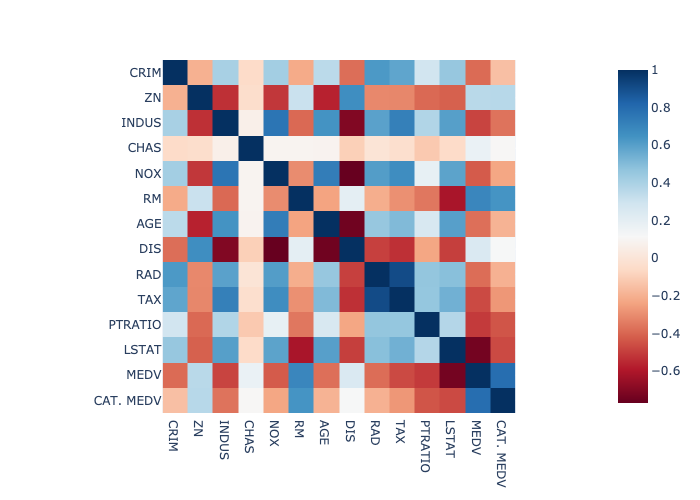

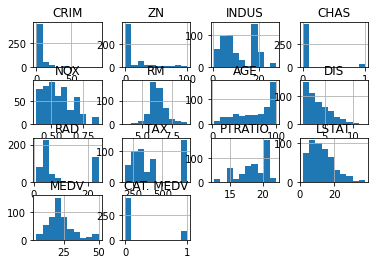

In [3]:
#EDA
display(df2.describe())
display(df2.hist())

# Normalizing  Data
df2norm = (df2 - df2.mean())/df2.std()

# Heatmap
corr = df2norm.corr()
# Caculate correlation coefficients.

DfLSHeatPlot = px.imshow(
   corr,color_continuous_scale="Rdbu")

DfLSHeatPlot.show("png")
# Show the plot.

In [4]:
# Splitting data

X=df2norm[['CAT. MEDV']]  # Putting DISTANCE as independent variable
y=df2norm['MEDV']      # Putting FARE as dependent variable 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 109)

In [5]:
# Showing performance

# Creating formula

def train_test_metrics(X_train,X_test,y_train,y_test,model):
    names=['R2','MAE','MAPE','SSE'] 
    
    # Training Metrics
    y_hat = model.predict(X_train)
    
    # Create R2
    r2 = r2_score(y_train,y_hat).round(3)
    
    # Create MAE
    mae = mean_absolute_error(y_train,y_hat).round(3)
    
    # Create MAPE
    mape = mean_absolute_percentage_error(y_train,y_hat).round(3)*100
    
    # Create MSE
    mse = (mean_squared_error(y_train,y_hat)*len(y_train)).round(3)
    
    train_metrics = [r2, mae, mape,mse]
    train_metrics = pd.DataFrame({'Train':train_metrics},index=names)
    
    # Testing Metrics
    y_hat = model.predict(X_test)
    test_metrics = [r2_score(y_test,y_hat).round(3),
                    mean_absolute_error(y_test,y_hat).round(3),
                    mean_absolute_percentage_error(y_test,y_hat).round(3)*100,
                    (mean_squared_error(y_test,y_hat)*len(y_test)).round(3)
                   ]
    test_metrics = pd.DataFrame({'Test':test_metrics},index=names)
    
    all_metrics = train_metrics.merge(test_metrics,left_index=True,right_index=True)
    
    print(pd.DataFrame({'Predictor':X_train.columns, 'coefficent':model.coef_.round(3)}))
    print('\n')
    print(all_metrics)
    print('\n')
def data_model_plot(X_train,X_test,y_train,y_test,model):

    x_train_sorted = X_train.copy()
    y_train_pred = model.predict(X_train)

    x_train_sorted.insert(1,'y_train_hat',y_train_pred)
    x_train_sorted.sort_values(by='CAT. MEDV',ascending=True,inplace=True)

    x_test_sorted = X_test.copy()
    y_test_pred = model.predict(X_test)

    x_test_sorted.insert(1,'y_test_hat',y_test_pred)
    x_test_sorted.sort_values(by='CAT. MEDV',ascending=True,inplace=True)

    trace0 = dict(mode='markers',
                  type='scatter',
                  name='Training Data',
                  marker = dict(size=10,
                                line=dict(width=1,
                                          color='DarkSlateGrey'),
                                opacity=0.7
                               ),
                  x=X_train.iloc[:,0],
                  y=y_train,
                  xaxis='x1',
                  yaxis='y'
                 )
    trace1 = dict(mode='markers',
                  type='scatter',
                  name='Test Data',
                  marker = dict(size=10,
                                line=dict(width=1,
                                          color='DarkSlateGrey'),
                                opacity=0.7
                               ),
                  x=X_test.iloc[:,0],
                  y=y_test,
                  xaxis='x2',
                  yaxis='y'
                 )

    trace2 = dict(mode='lines',
                  type='scatter',
                  name='Model->Train',
                  x=x_train_sorted.iloc[:,0],
                  y=x_train_sorted['y_train_hat'],
                  xaxis='x1',
                  yaxis='y'
                 )
    trace3 = dict(mode='lines',
                  type='scatter',
                  name='Model->Test',
                  x=x_test_sorted.iloc[:,0],
                  y=x_test_sorted['y_test_hat'],
                  xaxis='x2',
                  yaxis='y'
                 )
    layout = dict(title='Train vs Test',
                  xaxis1 = dict(title='Explanatory Variable',
                                showgrid=False,
                                anchor='y',
                                domain=[0,0.45]
                               ),
                  xaxis2 = dict(title='Explanatory Variable',
                                showgrid=False,
                                anchor='y',
                                domain=[0.55,1]
                               ),              
                  yaxis = dict(title='Target Variable',
                               showgrid=False,
                               zeroline=False
                              ),
                  plot_bgcolor='#eee8e8',
                  height=500,
                  width=900
                 )


    plot_data = [trace0,trace1,trace2,trace3]

    # Bring data and layout objects together in a single figure
    fig = go.Figure(plot_data,layout)

    # Render the figure
    return fig.show('png')

def display_output(X_train,X_test,y_train,y_test,model):
    print(pd.DataFrame({'Predictor':X_train.columns, 'coefficent':model.coef_}))
    print('\n')
    print(train_test_metrics(X_train,X_test,y_train,y_test,model))
    print('\n')
    data_model_plot(X_train,X_test,y_train,y_test,model)

   Predictor  coefficent
0  CAT. MEDV    0.849011


   Predictor  coefficent
0  CAT. MEDV       0.849


        Train     Test
R2      0.611    0.636
MAE     0.512    0.491
MAPE  316.900  180.000
SSE   139.536   52.664


None




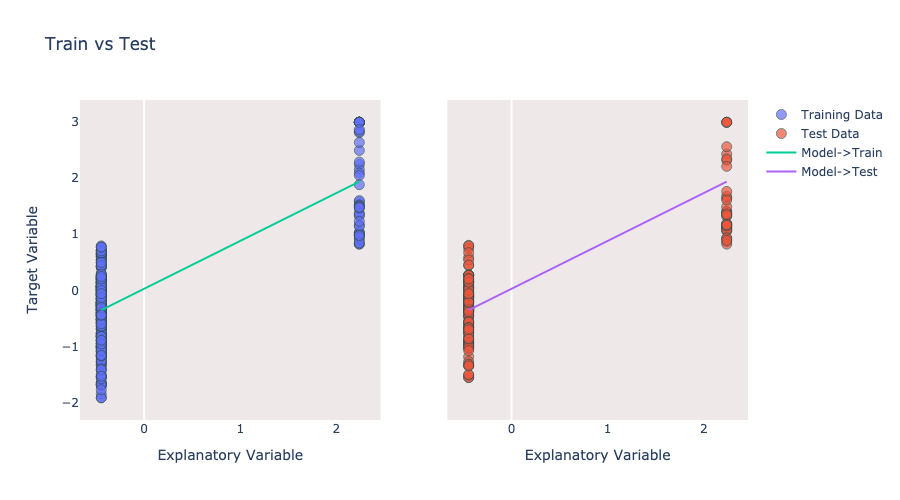

In [6]:
# Building regression

lin_model = LinearRegression()    
lin_model.fit(x_train, y_train) 


# Show regression plot and results
    
display_output(x_train,x_test,y_train,y_test,lin_model)

## Part B. 
### Create a slightly more complicated predictive model of the target variable.  In particular, add 1-3 more variables that you think have potential to improve your model.

><font color='blue'> By observing the heatmap, we can find the four variables with the highest correlation coefficient with MEDV in descending order are CAT. MEDV, LSTAT, RM, and PTRATIO. </font>

#### Take note of any differences in model performance from 1. to 2.

><font color='blue'> R-square in the new model is higher than in the old model, and MAE, MAPE, and SSE in the new model are lower than in the old model. Although the MAE score in training set is slightly lower than in test set, the MAPE score in training set of the new model is lower than in test set, so the new model is better than the old model. </font>

#### Do you notice any major changes in the magnitudes of your parameter estimates?  

><font color='blue'> Compared to the first regression model, CAT. MEDV in this new model has a lower coefficient, but it still has the highest coefficient in this new model.</font>

#### Pick one parameter estimate and, in words, describe what it means?

><font color='blue'> The coefficient of CAT. MEDV means for every one unit increase in CAT. MEDV, MEDV will increase by 0.54 units.</font>

In [7]:
# Splitting data

X=df2norm[['CAT. MEDV','LSTAT','RM','PTRATIO']]  
y=df2norm['MEDV']      # Putting FARE as dependent variable 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 109)

   Predictor  coefficent
0  CAT. MEDV    0.540556
1      LSTAT   -0.414542
2         RM    0.072407
3    PTRATIO   -0.133293


   Predictor  coefficent
0  CAT. MEDV       0.541
1      LSTAT      -0.415
2         RM       0.072
3    PTRATIO      -0.133


        Train    Test
R2      0.816   0.773
MAE     0.322   0.350
MAPE  236.900  96.300
SSE    66.144  32.848


None




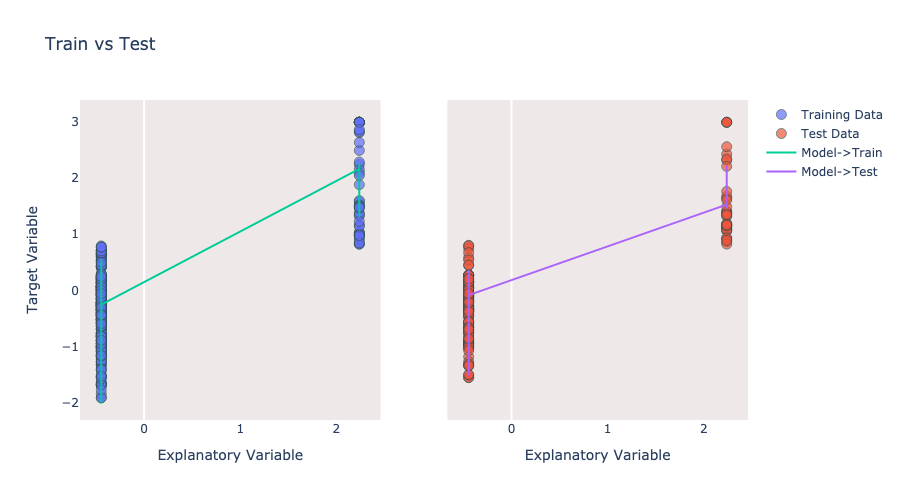

In [8]:
# Building regression

lin_model = LinearRegression()    
lin_model.fit(x_train, y_train) 

# Show regression plot and results
    
display_output(x_train,x_test,y_train,y_test,lin_model)

## Part C. 
### Add all potential explanatory variables to your model and any data transformations you think could be helpful.  Use Ridge or Lasso regression in collaboration with Cross-Validation to arrive at a final model form. Note: your use of the methods above should result in some parameters dropping out of your model - take note of which parameters and associated variables are important to good model fit and a low degree of model variability.

><font color='blue'> The Final Model is the best model with a low MAPE score, a low MAE score, and a high R-square score in both train and test data, which is 0.851 and 0.801. Variables LSTAT, MEDV, and NOX are important to good model and a low degree of model variability.</font>

In [9]:
X = df2norm[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'CAT. MEDV']]
y = df2norm['MEDV']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=109)

r_alphas = [0.04,0.06,0.08,0.085,0.09,0.099,.1,0.11,0.2,0.25]

model = RidgeCV(alphas=r_alphas)
model.fit(X_train,y_train)

train_test_metrics(X_train,X_test,y_train,y_test,model)

    Predictor  coefficent
0        CRIM      -0.110
1          ZN      -0.016
2       INDUS       0.069
3        CHAS       0.091
4         NOX      -0.218
5          RM       0.067
6         AGE      -0.019
7         DIS      -0.190
8         RAD       0.171
9         TAX      -0.145
10    PTRATIO      -0.159
11      LSTAT      -0.374
12  CAT. MEDV       0.515


        Train     Test
R2      0.851    0.801
MAE     0.281    0.338
MAPE  190.800  113.400
SSE    53.595   28.765


